<a href="https://colab.research.google.com/github/eanasir/SSN-MEiL/blob/main/ssn_meil_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def input_data(inputs,weights):
  potential_array = np.multiply(inputs,weights)
  potential = np.sum(potential_array)
  layer ={
      "activation_potential": potential,
      "output": None
  }
  return layer

def linear(layer,derivative = False):
  if not derivative:
    return layer['activation_potential']
  else:
    return np.ones_like(layer['activation_potential'])

def sigmoid(layer,derivative = False):

  sigmoid = lambda v : 1 / (1 + np.exp(-v))
  sigmoid_derivative = lambda v : sigmoid(v) * (1 - sigmoid(v))

  if not derivative:
    return sigmoid(layer["activation_potential"])
  else:
    return sigmoid_derivative(layer["activation_potential"])

def tanh(layer,derivative = False):

  tanh_derivative = lambda v : 1 - np.tanh(v)**2

  if not derivative:
    return np.tanh(layer["activation_potential"])
  else:
    return tanh_derivative(layer["activation_potential"])

def ReLU(layer,derivative = False):
  output = list()
  if not derivative:
    for item in layer['activation_potential']:
      output.append(max(0,item))
  else:
    for item in layer['activation_potential']:
      if item >= 0:
        output.append(1)
      else:
        output.append(0)
  return output


input_size = 10
inputs = [np.random.randn() for i in range(input_size)]
weights = [np.random.randn() for i in range(input_size)]

print(input_data(inputs,weights))


{'activation_potential': np.float64(3.7262645997257593), 'output': None}


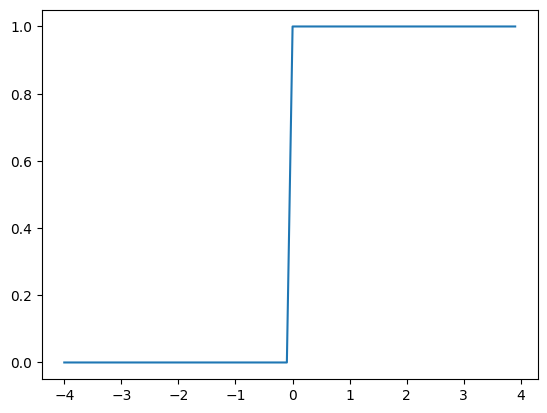

In [ ]:
import matplotlib.pyplot as plt


layer = {
'activation_potential': np.arange(-4.0, 4.0, 0.1),
'output': None
}


plt.figure
plt.show()
plt.plot(layer['activation_potential'], ReLU(layer,derivative = True))

In [ ]:
import sys


class Activation_fcn:
  def __init__(self):
    self.functions = {
      'linear': self.linear,
      'sigmoid': self.logistic,
      'logistic': self.logistic,
      'tanh': self.tanh,
      'ReLU': self.relu
      }

  def output(self, input, name):
    if name in self.functions:
      return self.functions[name](input)
    else:
      sys.exit(f"Error: Activation function'{name}' not found.")


  def linear(layer,derivative = False):
    if not derivative:
      return layer['activation_potential']
    else:
      return np.ones_like(layer['activation_potential'])

  def sigmoid(layer,derivative = False):

    sigmoid = lambda v : 1 / (1 + np.exp(-v))
    sigmoid_derivative = lambda v : sigmoid(v) * (1 - sigmoid(v))

    if not derivative:
      return sigmoid(layer["activation_potential"])
    else:
      return sigmoid_derivative(layer["activation_potential"])

  def tanh(layer,derivative = False):

    tanh_derivative = lambda v : 1 - np.tanh(v)**2

    if not derivative:
      return np.tanh(layer["activation_potential"])
    else:
      return tanh_derivative(layer["activation_potential"])

  def ReLU(layer,derivative = False):
    output = list()
    if not derivative:
      for item in layer['activation_potential']:
        output.append(max(0,item))
    else:
      for item in layer['activation_potential']:
        if item >= 0:
          output.append(1)
        else:
          output.append(0)
    return output
  def logistic(layer,derivative =False):
    logistic = lambda v : 1 / (1 + np.exp(-v - 0.5))
    logistic_derivative = lambda v : logistic(v) * (1 - sigmoid(v))

    if not derivative:
      return logistic(layer["activation_potential"])
    else:
      return logistic_derivative(layer["activation_potential"])

In [ ]:
import sys
import numpy as np


class Loss_fcn:
  def __init__(self):
    self.functions = {
      'mse': self.mse,
      'bc_entropy': self.bc_entropy
      }
  def mse(self, expected, outputs, derivative=False):

    expected = np.asarray(expected, dtype=float)
    outputs = np.asarray(outputs, dtype=float)

    if not derivative:
      return np.power(expected - outputs, 2)
    else:
      return -2*(expected - outputs)

  def bc_entropy(self,expected,outputs,derivative = False):

    expected = np.asarray(expected, dtype=float)
    outputs = np.asarray(outputs, dtype=float)

    if not derivative:
      return expected * np.log(outputs) + (1- expected) * np.log(1 - outputs)
    else:
      return (1 - expected) / (1- outputs) - (expected / outputs)

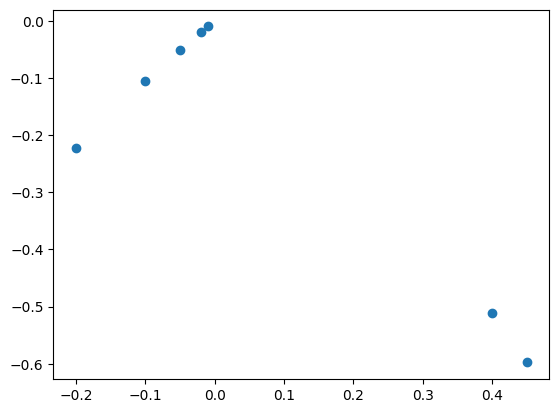

In [ ]:
import matplotlib.pyplot as plt

def visualize_loss_fcn(expected, outputs, loss_function):
    loss = Loss_fcn()
    if loss_function not in loss.functions:
        print("Function not recognized")
        return

    expected = np.asarray(expected, dtype=float)
    outputs = np.asarray(outputs, dtype=float)

    y = loss.functions[loss_function](expected, outputs, derivative=False)
    x = expected - outputs

    plt.figure()
    plt.plot(x, y,'o')
    plt.show()


expected = [0, 0, 0, 0, 0, 1, 1]
outputs  = [0.01, 0.10, 0.20, 0.05, 0.02, 0.55, 0.60]




visualize_loss_fcn(expected,outputs,"bc_entropy")
